In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path to the directory containing the extracted dataset
extract_dir = "/kaggle/input/imagedd"

# Check if the 'Dataset' folder exists
if 'Dataset' in os.listdir(extract_dir):
    # Define the path to the 'Dataset' folder
    dataset_dir = os.path.join(extract_dir, "Dataset")

    # Define the paths to the 'Test', 'Train', and 'Validation' folders
    test_dir = os.path.join(dataset_dir, "Test")
    train_dir = os.path.join(dataset_dir, "Train")
    validation_dir = os.path.join(dataset_dir, "Validation")

    # Function to extract file paths and labels
    def extract_files_and_labels(folder_path):
        fake_files = os.listdir(os.path.join(folder_path, "Fake"))
        real_files = os.listdir(os.path.join(folder_path, "Real"))
        
        fake_labels = np.zeros(len(fake_files))  # Assign label 0 to fake images
        real_labels = np.ones(len(real_files))   # Assign label 1 to real images

        file_paths = [os.path.join(folder_path, "Fake", file) for file in fake_files] + \
                     [os.path.join(folder_path, "Real", file) for file in real_files]
        labels = np.concatenate([fake_labels, real_labels])
        
        return file_paths, labels

    # Extract files and labels for training, testing, and validation sets
    X_train, y_train = extract_files_and_labels(train_dir)
    X_test, y_test = extract_files_and_labels(test_dir)
    X_validation, y_validation = extract_files_and_labels(validation_dir)

    # Print some example file paths and labels
    print("Example training files:", X_train[:5])
    print("Example testing files:", X_test[:5])
    print("Example validation files:", X_validation[:5])
    print("Labels:", y_train)


Example training files: ['/kaggle/input/imagedd/Dataset/Train/Fake/fake_12723.jpg', '/kaggle/input/imagedd/Dataset/Train/Fake/fake_24129.jpg', '/kaggle/input/imagedd/Dataset/Train/Fake/fake_21071.jpg', '/kaggle/input/imagedd/Dataset/Train/Fake/fake_13601.jpg', '/kaggle/input/imagedd/Dataset/Train/Fake/fake_43500.jpg']
Example testing files: ['/kaggle/input/imagedd/Dataset/Test/Fake/fake_1068.jpg', '/kaggle/input/imagedd/Dataset/Test/Fake/fake_3016.jpg', '/kaggle/input/imagedd/Dataset/Test/Fake/fake_4215.jpg', '/kaggle/input/imagedd/Dataset/Test/Fake/fake_1467.jpg', '/kaggle/input/imagedd/Dataset/Test/Fake/fake_4367.jpg']
Example validation files: ['/kaggle/input/imagedd/Dataset/Validation/Fake/fake_12723.jpg', '/kaggle/input/imagedd/Dataset/Validation/Fake/fake_13601.jpg', '/kaggle/input/imagedd/Dataset/Validation/Fake/fake_1068.jpg', '/kaggle/input/imagedd/Dataset/Validation/Fake/fake_16385.jpg', '/kaggle/input/imagedd/Dataset/Validation/Fake/fake_3016.jpg']
Labels: [0. 0. 0. ... 1. 1

In [2]:
%pip install optree
#%pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#%pip install --upgrade pip

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_SIZE = (128, 128)  # Resize images to this size


# Function to load and preprocess images
def load_and_preprocess(file_paths):
    images = []
    for file_path in file_paths:
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, IMAGE_SIZE)  # Resize
        image = image.astype(np.float32) / 255.0  # Normalize pixel values
        images.append(image)
    return np.array(images)

2024-05-15 17:28:54.015266: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 17:28:54.015358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 17:28:54.116500: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 64

# Load and preprocess data in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary')



Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


In [ ]:
# Define a simpler model
'''model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model using data generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)'''


In [5]:
# Define a generator for testing data
from tensorflow.keras.models import load_model
model = load_model("/kaggle/input/test-deepfake/model_15_64 (1).h5")
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess test data in batches
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)  # Important to set shuffle to False to ensure correct mapping of predictions

# Make predictions
y_pred = model.predict(test_generator)


Found 10905 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/171 ━━━━━━━━━━━━━━━━━━━━ 6:29 2s/step

I0000 00:00:1715794456.088649     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


171/171 ━━━━━━━━━━━━━━━━━━━━ 56s 315ms/step


In [6]:
y_pred

array([[0.4966304 ],
       [0.24699831],
       [0.05409698],
       ...,
       [0.88046825],
       [0.57146347],
       [0.2905304 ]], dtype=float32)

In [ ]:
'''import cv2
import numpy as np
from tensorflow.keras.models import load_model

# save the trained model
model.save("/kaggle/working/model_15_64.h5")'''

In [8]:
model = load_model("/kaggle/input/test-deepfake/model_15_64 (1).h5")  # Replace "path_to_your_trained_model.h5" with the actual path

# Function to preprocess a single image
def preprocess_image(image_path):
    try:
        # Load and preprocess the image
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Failed to load image: {image_path}")
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, (128, 128))  # Resize to match model input size
        image = image.astype(np.float32) / 255.0  # Normalize pixel values
        return np.expand_dims(image, axis=0)  # Add batch dimension
    except Exception as e:
        print(f"Error preprocessing image: {e}")
        return None

# Function to predict whether an image is fake or real
def predict_image(image_path):
    # Preprocess the image
    processed_image = preprocess_image(image_path)
    if processed_image is None:
        return None
    
    # Make prediction
    prediction = model.predict(processed_image)
    
    # Convert prediction to class label (0 for fake, 1 for real)
    if prediction  < 0.5:
        return "Fake"
    else:
        return "Real"

# Example usage:
image_path = "/kaggle/input/imagedd/Dataset/Validation/Real/real_10005.jpg"  # Replace "path_to_your_image.jpg" with the actual path
prediction = predict_image(image_path)
if prediction is not None:
    print("Prediction:", prediction)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Prediction: Real


In [21]:
#plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()

171/171 ━━━━━━━━━━━━━━━━━━━━ 25s 147ms/step - accuracy: 0.7945 - loss: 0.4605


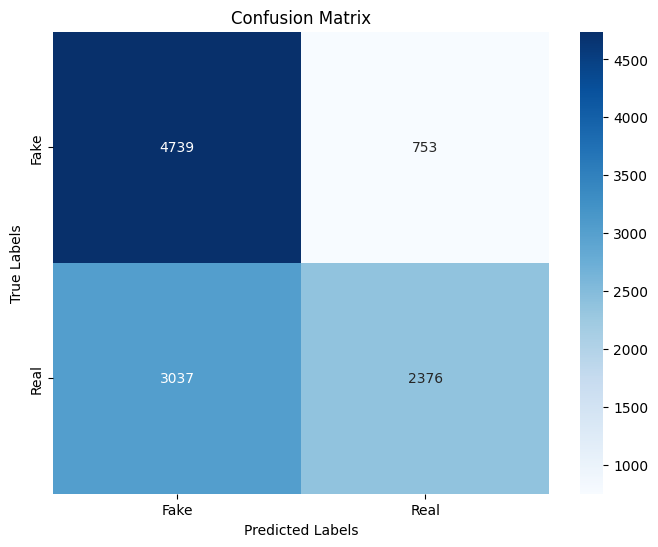

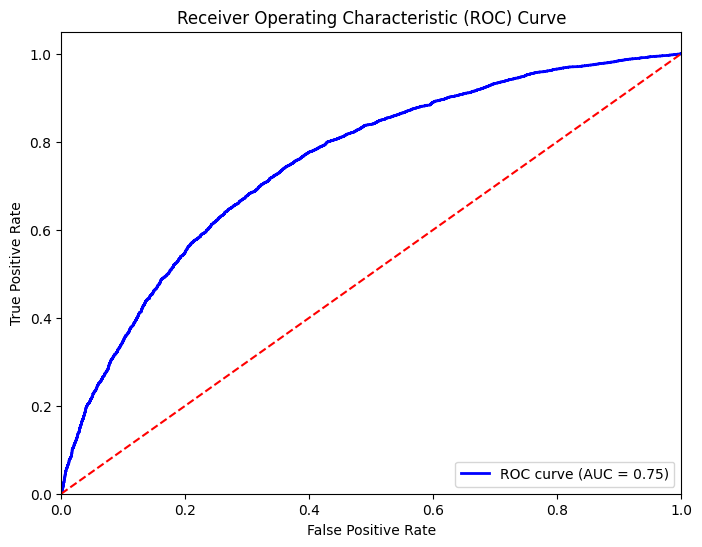

In [19]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Convert predictions to binary classes (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig('conf_matrix.png')
plt.show()

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(test_generator.classes, y_pred)
roc_auc = roc_auc_score(test_generator.classes, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.show()


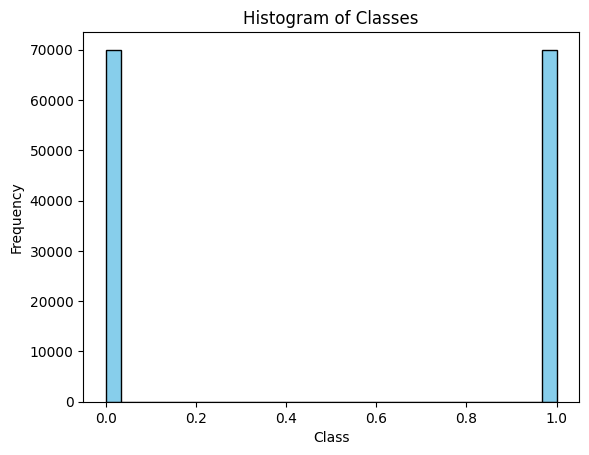

In [18]:
plt.hist(train_generator.classes, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Classes')
plt.savefig('hist_plot.png')
plt.show()

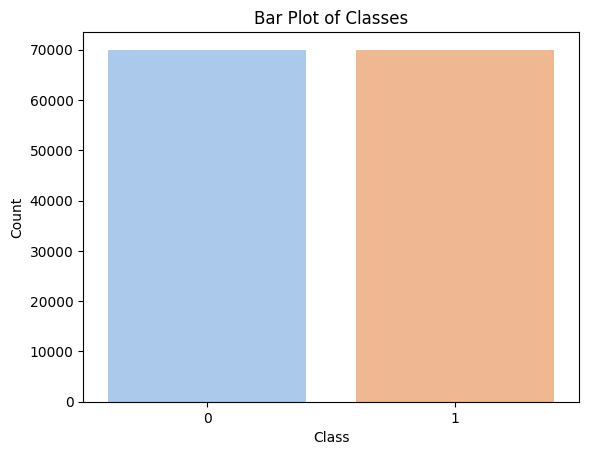

In [17]:
# Example bar plot
sns.countplot(x=train_generator.classes, palette='pastel')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Plot of Classes')
plt.savefig('bar_plot.png')
plt.show()

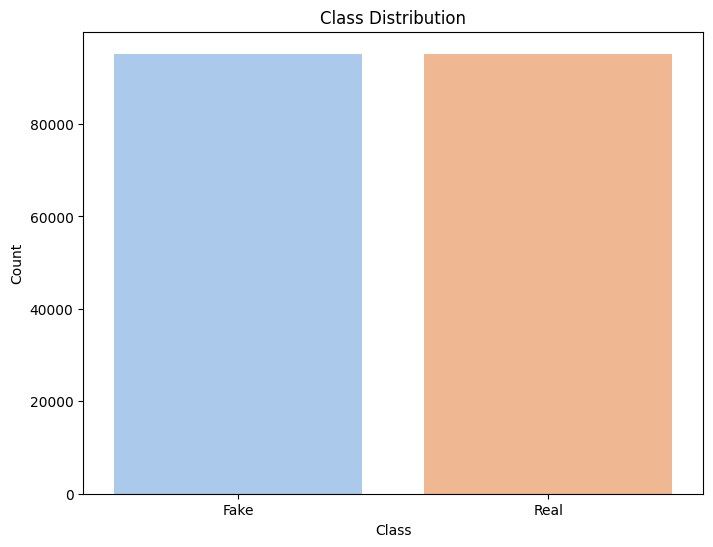

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate the labels from training, testing, and validation sets
all_labels = np.concatenate([y_train, y_test, y_validation])

# Count the occurrences of each class
class_counts = np.bincount(all_labels.astype(int))

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=all_labels, palette='pastel')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()


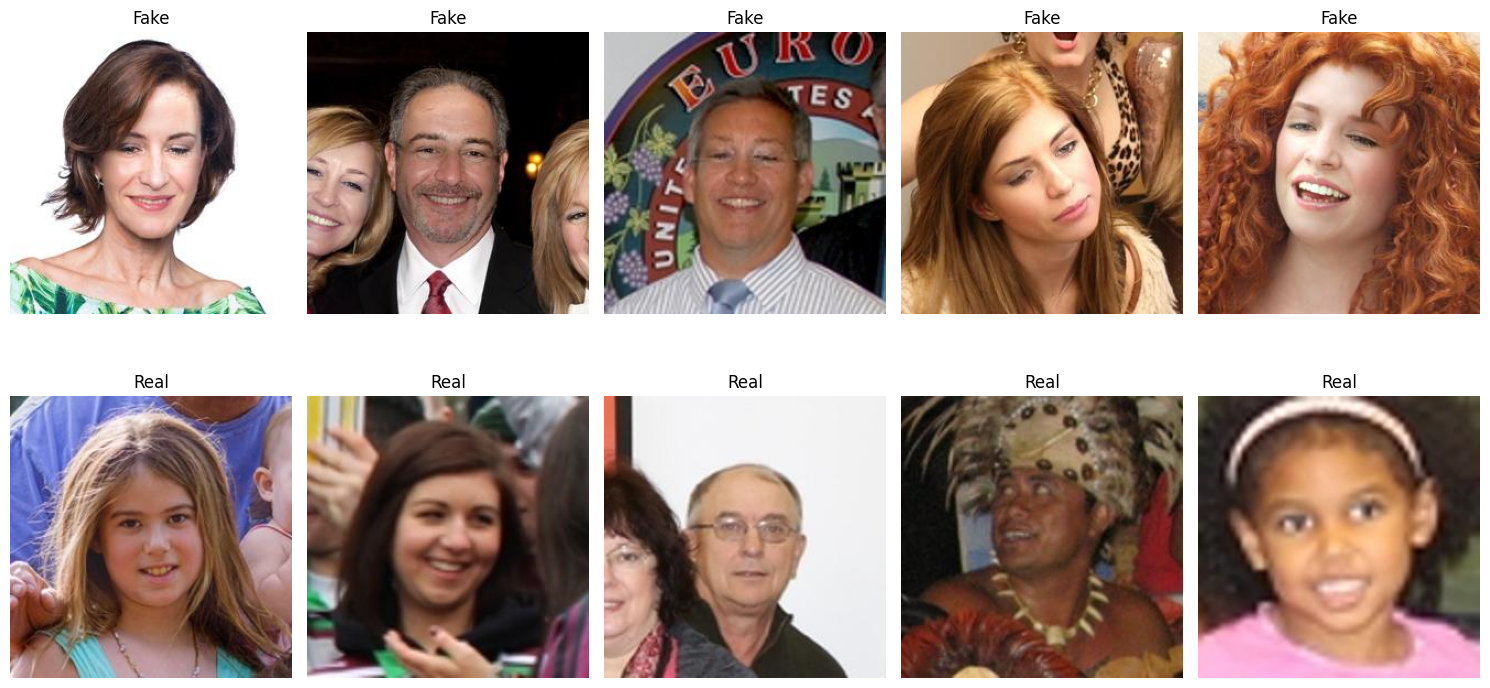

In [25]:
# Function to display sample images
def display_sample_images(file_paths, labels, num_samples=5):
    plt.figure(figsize=(15, 8))
    for i in range(2):  # Loop through fake and real classes
        class_indices = np.where(labels == i)[0]
        sample_indices = np.random.choice(class_indices, num_samples, replace=False)
        for j, index in enumerate(sample_indices):
            plt.subplot(2, num_samples, i * num_samples + j + 1)
            image = cv2.imread(file_paths[index])
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)
            plt.title('Fake' if i == 0 else 'Real')
            plt.axis('off')
    plt.tight_layout()
    plt.savefig("samples.png")
    plt.show()

# Display sample images from the training set
display_sample_images(X_train, y_train)


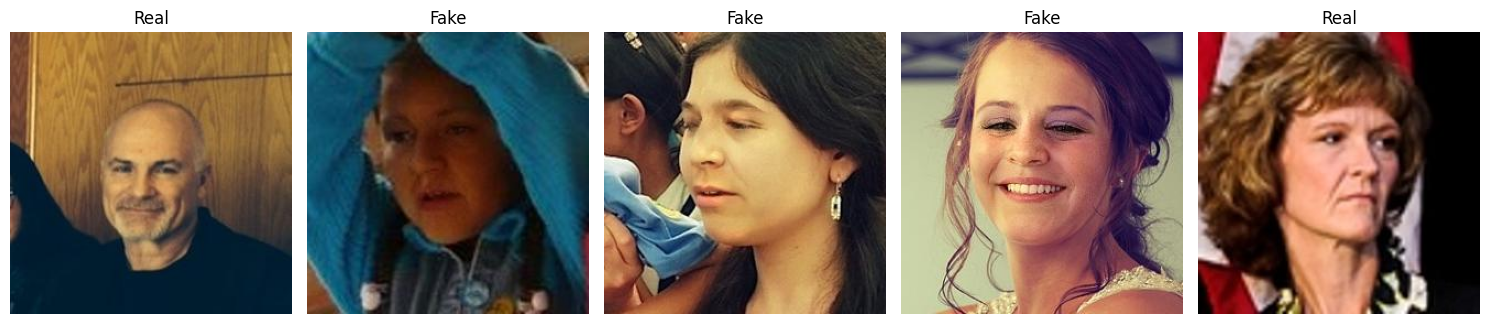

In [27]:
import random

# Function to display random images with labels
def display_random_images_with_labels(file_paths, labels, num_images=5):
    plt.figure(figsize=(15, 8))
    random_indices = random.sample(range(len(file_paths)), num_images)
    for i, index in enumerate(random_indices):
        plt.subplot(1, num_images, i + 1)
        image = cv2.imread(file_paths[index])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        label = "Fake" if labels[index] == 0 else "Real"
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display random images with labels from the training set
display_random_images_with_labels(X_train, y_train)


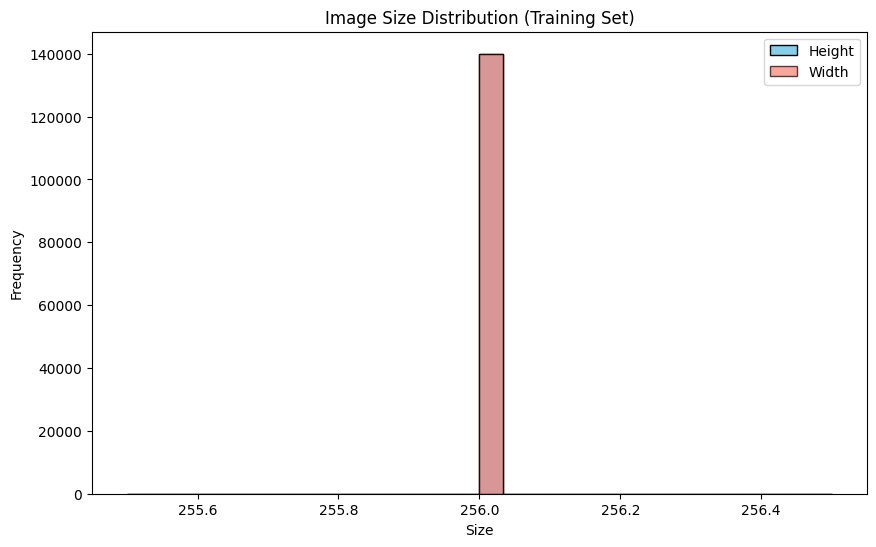

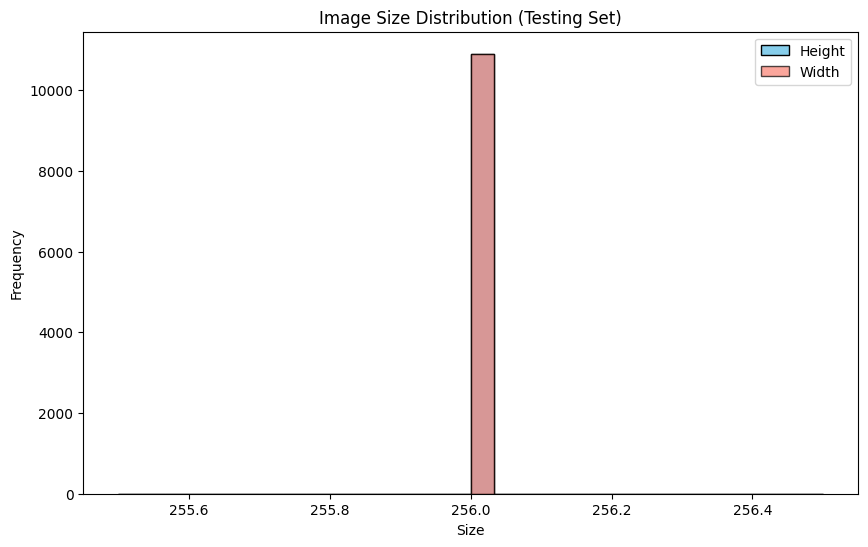

<Figure size 640x480 with 0 Axes>

In [37]:
# Function to plot image size distribution
def plot_image_size_distribution(image_sizes, title):
    plt.figure(figsize=(10, 6))
    plt.hist(image_sizes[:, 0], bins=30, color='skyblue', edgecolor='black', label='Height')
    plt.hist(image_sizes[:, 1], bins=30, color='salmon', edgecolor='black', alpha=0.7, label='Width')
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot image size distribution for the training set
plot_image_size_distribution(train_image_sizes, title='Image Size Distribution (Training Set)')

# Plot image size distribution for the testing set
plot_image_size_distribution(test_image_sizes, title='Image Size Distribution (Testing Set)')
plt.savefig("distribution.png")






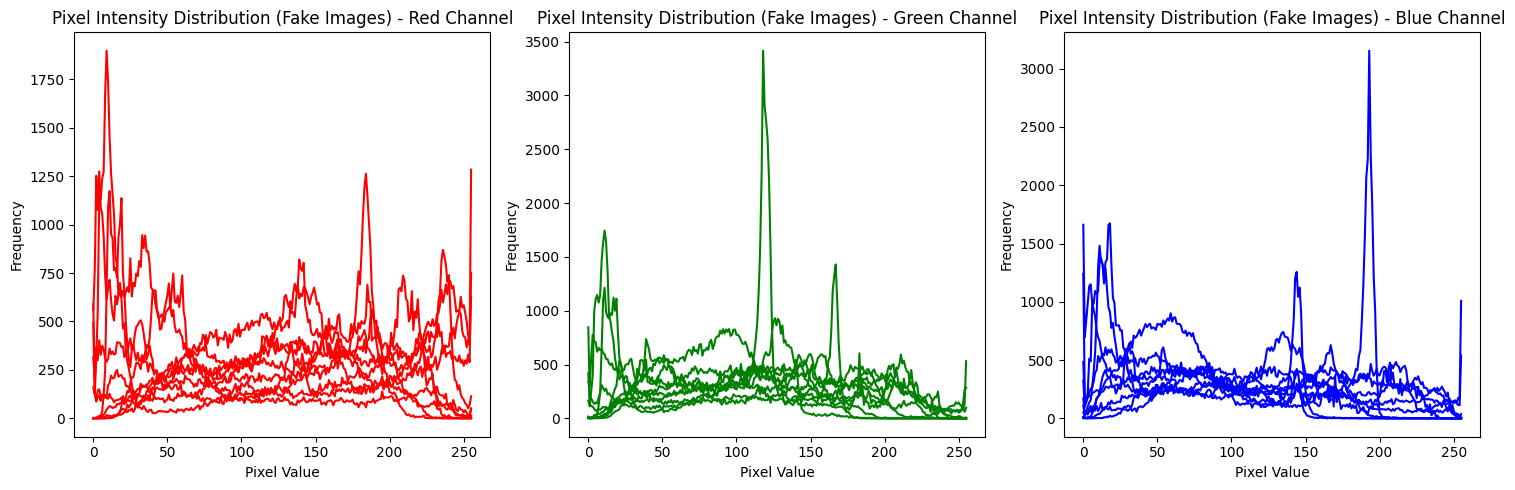

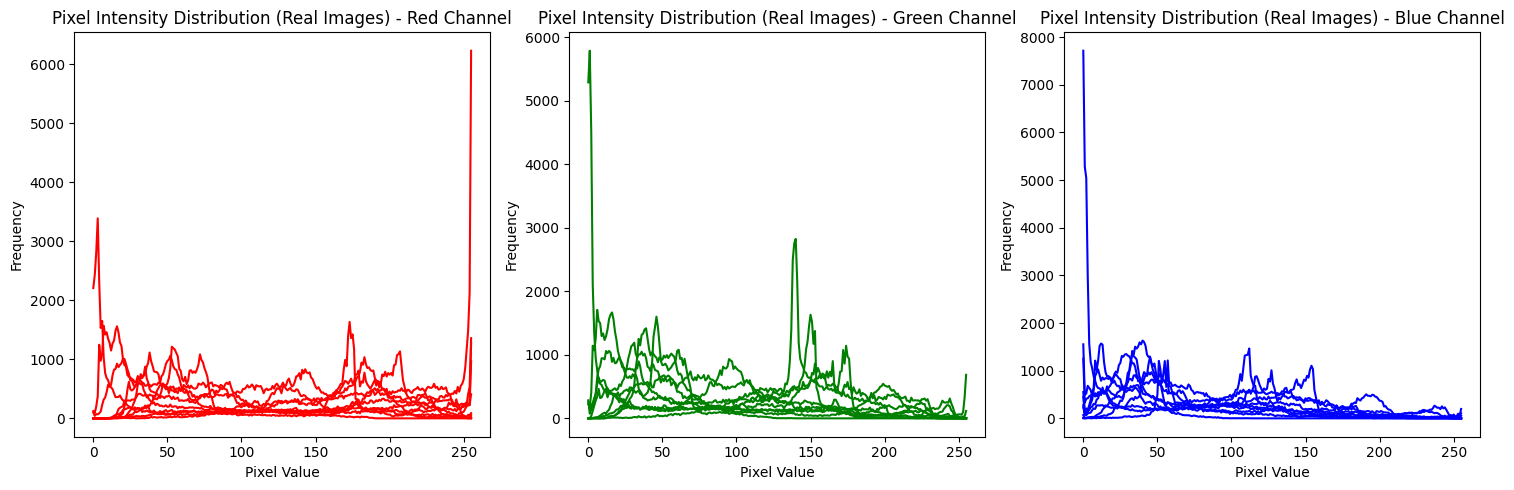

<Figure size 640x480 with 0 Axes>

In [35]:
# Function to compute pixel intensity histograms for a set of images
def compute_pixel_intensity_histograms(file_paths, max_images=10):
    histograms = []
    num_images = min(len(file_paths), max_images)
    random_indices = random.sample(range(len(file_paths)), num_images)
    for index in random_indices:
        file_path = file_paths[index]
        image = cv2.imread(file_path)
        if image is not None:
            # Convert image from BGR to RGB
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Compute histograms for each color channel
            hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
            hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
            hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])
            histograms.append((hist_r, hist_g, hist_b))
    return histograms

# Compute pixel intensity histograms for fake and real images separately
fake_intensity_histograms = compute_pixel_intensity_histograms([path for path, label in zip(X_train, y_train) if label == 0])
real_intensity_histograms = compute_pixel_intensity_histograms([path for path, label in zip(X_train, y_train) if label == 1])

# Plot pixel intensity histograms for fake images
plot_color_histograms(fake_intensity_histograms, title='Pixel Intensity Distribution (Fake Images)')

# Plot pixel intensity histograms for real images
plot_color_histograms(real_intensity_histograms, title='Pixel Intensity Distribution (Real Images)')
plt.savefig("pixel_intensity.png")


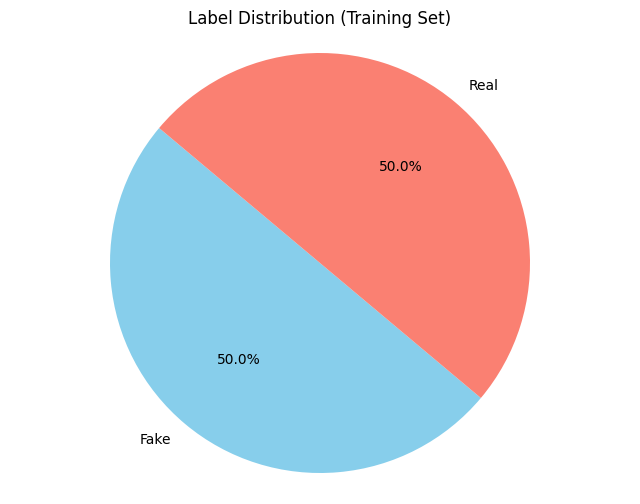

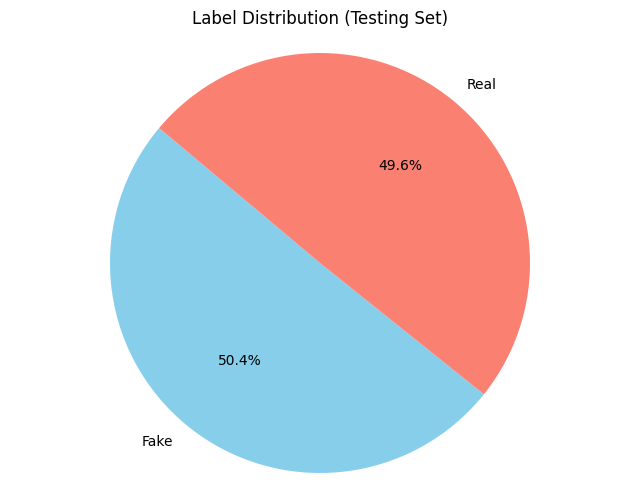

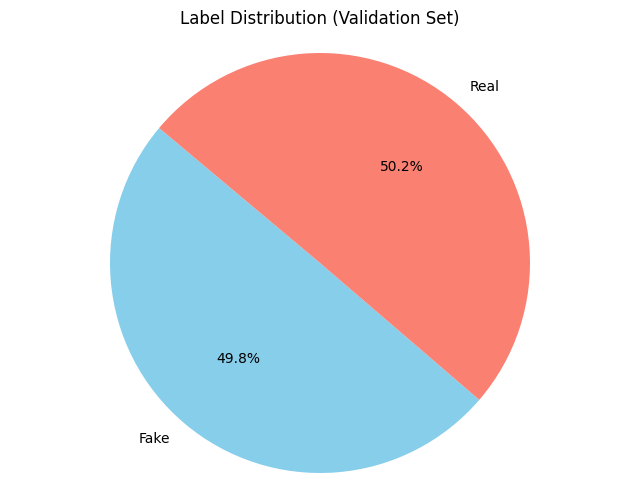

<Figure size 640x480 with 0 Axes>

In [40]:
# Function to plot label distribution
def plot_label_distribution(labels, title):
    fake_count = np.sum(labels == 0)
    real_count = np.sum(labels == 1)
    labels_count = [fake_count, real_count]
    labels_names = ['Fake', 'Real']
    
    plt.figure(figsize=(8, 6))
    plt.pie(labels_count, labels=labels_names, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Plot label distribution for training set
plot_label_distribution(y_train, title='Label Distribution (Training Set)')

# Plot label distribution for testing set
plot_label_distribution(y_test, title='Label Distribution (Testing Set)')

# Plot label distribution for validation set
plot_label_distribution(y_validation, title='Label Distribution (Validation Set)')
plt.savefig("label_dist.png")


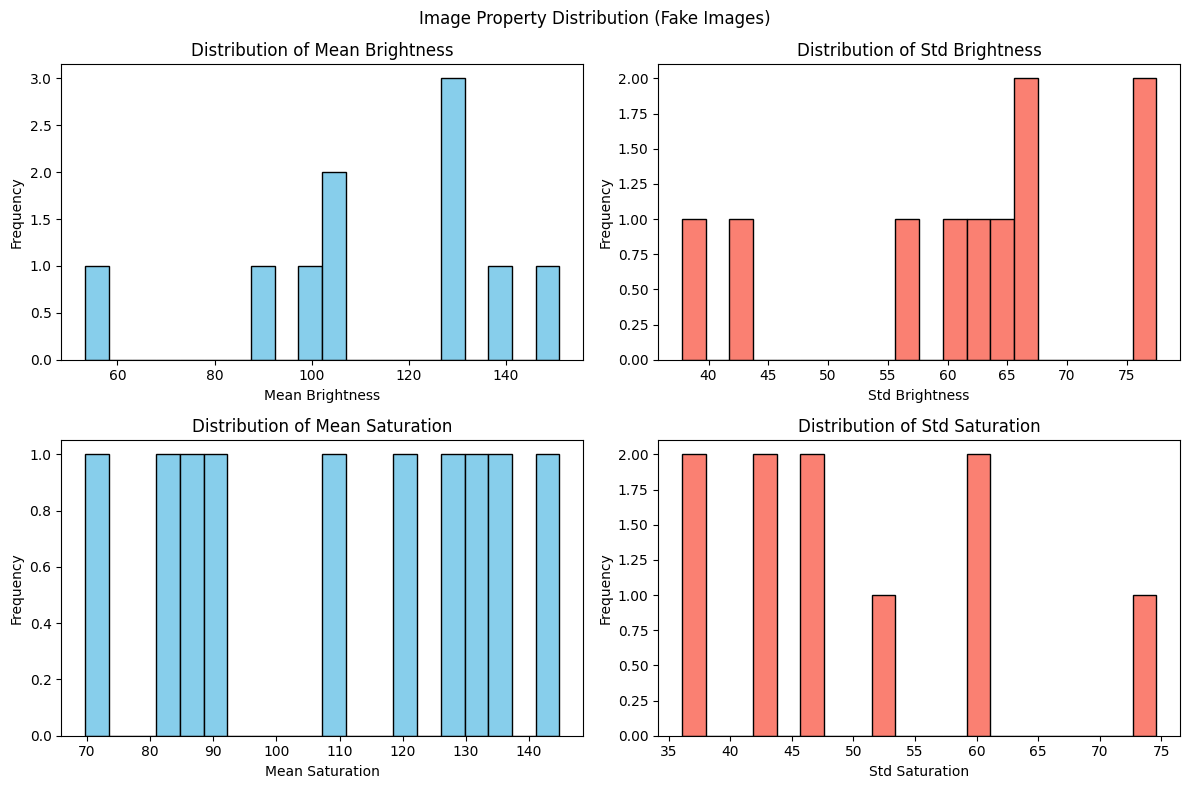

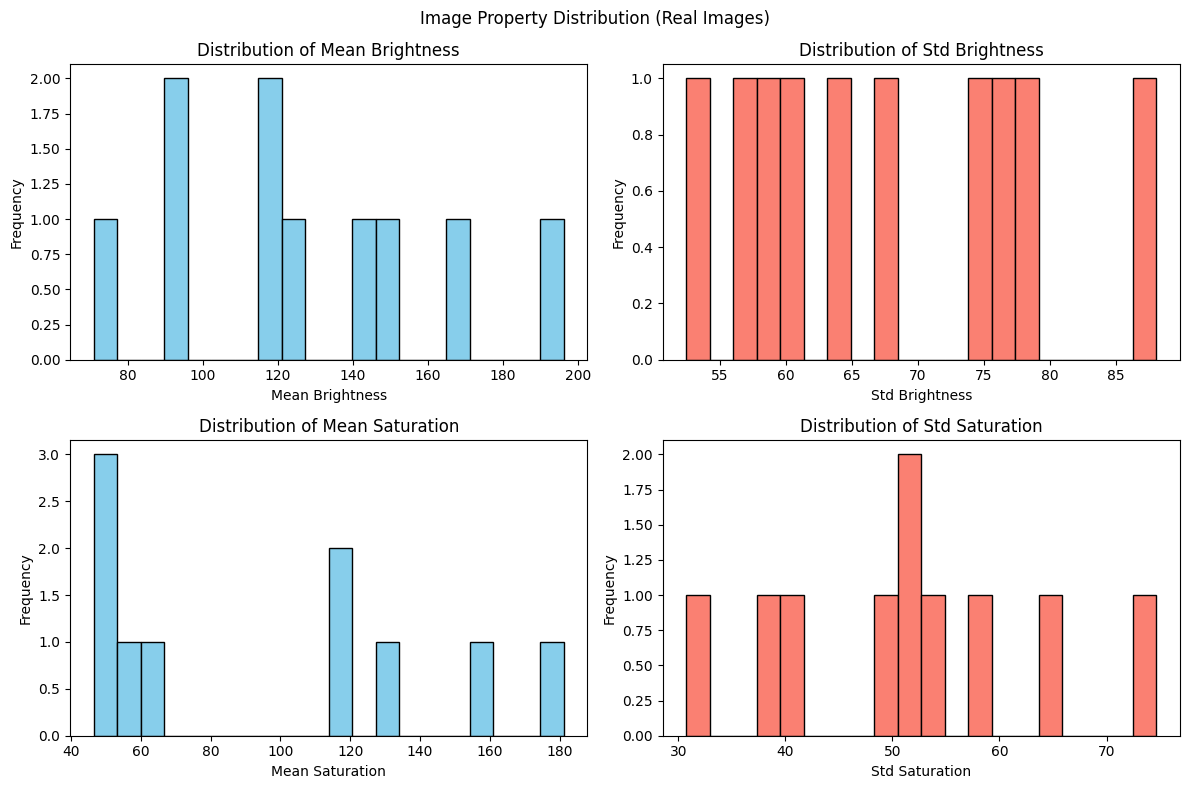

In [41]:
# Function to compute image properties (brightness, contrast, saturation)
def compute_image_properties(file_paths, max_images=10):
    properties = []
    num_images = min(len(file_paths), max_images)
    random_indices = random.sample(range(len(file_paths)), num_images)
    for index in random_indices:
        file_path = file_paths[index]
        image = cv2.imread(file_path)
        if image is not None:
            # Convert image from BGR to HSV
            image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            # Compute properties
            mean_brightness = np.mean(image_hsv[:,:,2])
            std_brightness = np.std(image_hsv[:,:,2])
            mean_saturation = np.mean(image_hsv[:,:,1])
            std_saturation = np.std(image_hsv[:,:,1])
            properties.append((mean_brightness, std_brightness, mean_saturation, std_saturation))
    return properties

# Compute image properties for fake and real images separately
fake_properties = compute_image_properties([path for path, label in zip(X_train, y_train) if label == 0])
real_properties = compute_image_properties([path for path, label in zip(X_train, y_train) if label == 1])

# Plot distributions of image properties
def plot_image_property_distribution(properties, title):
    properties = np.array(properties)
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.hist(properties[:, 0], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Mean Brightness')
    plt.ylabel('Frequency')
    plt.title('Distribution of Mean Brightness')
    plt.subplot(2, 2, 2)
    plt.hist(properties[:, 1], bins=20, color='salmon', edgecolor='black')
    plt.xlabel('Std Brightness')
    plt.ylabel('Frequency')
    plt.title('Distribution of Std Brightness')
    plt.subplot(2, 2, 3)
    plt.hist(properties[:, 2], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Mean Saturation')
    plt.ylabel('Frequency')
    plt.title('Distribution of Mean Saturation')
    plt.subplot(2, 2, 4)
    plt.hist(properties[:, 3], bins=20, color='salmon', edgecolor='black')
    plt.xlabel('Std Saturation')
    plt.ylabel('Frequency')
    plt.title('Distribution of Std Saturation')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot distributions of image properties for fake images
plot_image_property_distribution(fake_properties, title='Image Property Distribution (Fake Images)')

# Plot distributions of image properties for real images
plot_image_property_distribution(real_properties, title='Image Property Distribution (Real Images)')


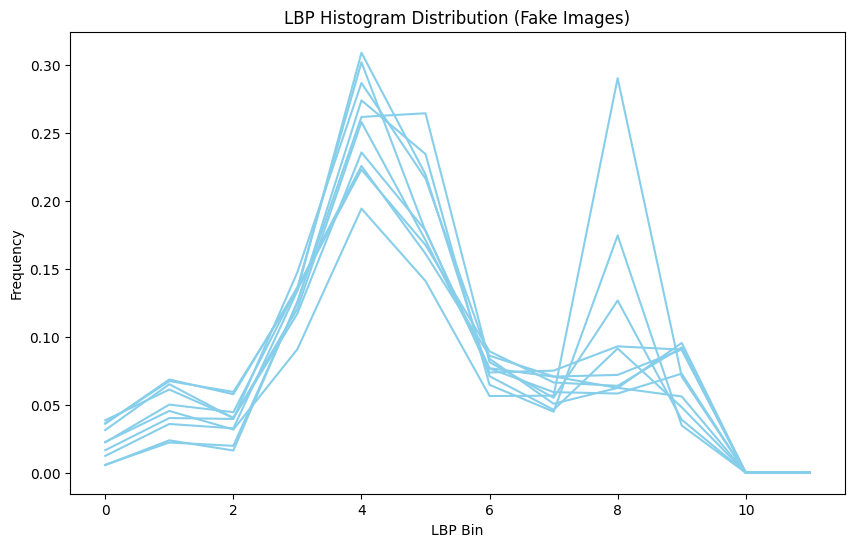

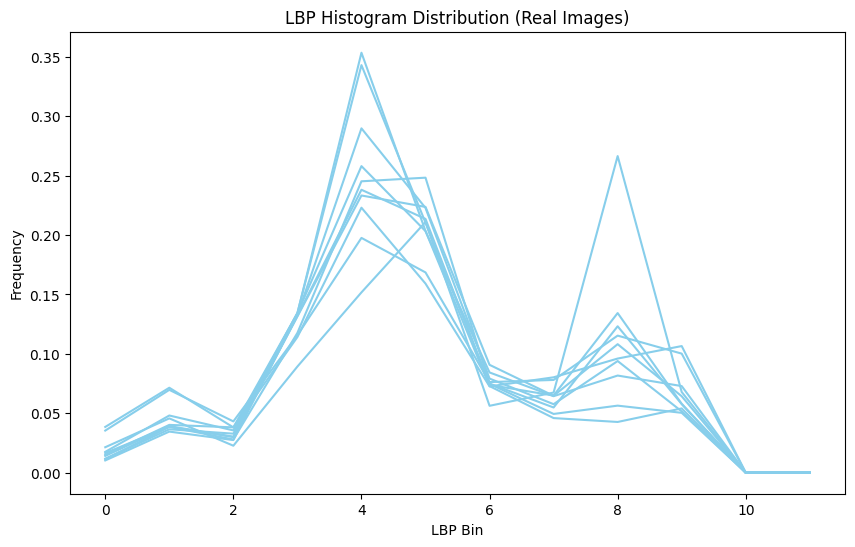

In [44]:
# Add this import statement at the beginning of your code
from skimage.feature import local_binary_pattern


def compute_lbp(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Compute LBP
    lbp = local_binary_pattern(gray, 8, 1, method='uniform')
    # Compute histogram of LBP
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 10 + 3), range=(0, 10 + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

# Function to compute LBP histograms for a set of images
def compute_lbp_histograms(file_paths, max_images=10):
    histograms = []
    num_images = min(len(file_paths), max_images)
    random_indices = random.sample(range(len(file_paths)), num_images)
    for index in random_indices:
        file_path = file_paths[index]
        image = cv2.imread(file_path)
        if image is not None:
            # Compute LBP for the image
            lbp_hist = compute_lbp(image)
            histograms.append(lbp_hist)
    return histograms

# Compute LBP histograms for fake and real images separately
fake_lbp_histograms = compute_lbp_histograms([path for path, label in zip(X_train, y_train) if label == 0])
real_lbp_histograms = compute_lbp_histograms([path for path, label in zip(X_train, y_train) if label == 1])

# Plot distributions of LBP histograms
def plot_lbp_histogram_distribution(histograms, title):
    plt.figure(figsize=(10, 6))
    for hist in histograms:
        plt.plot(hist, color='skyblue')
    plt.xlabel('LBP Bin')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plot distributions of LBP histograms for fake images
plot_lbp_histogram_distribution(fake_lbp_histograms, title='LBP Histogram Distribution (Fake Images)')

# Plot distributions of LBP histograms for real images
plot_lbp_histogram_distribution(real_lbp_histograms, title='LBP Histogram Distribution (Real Images)')


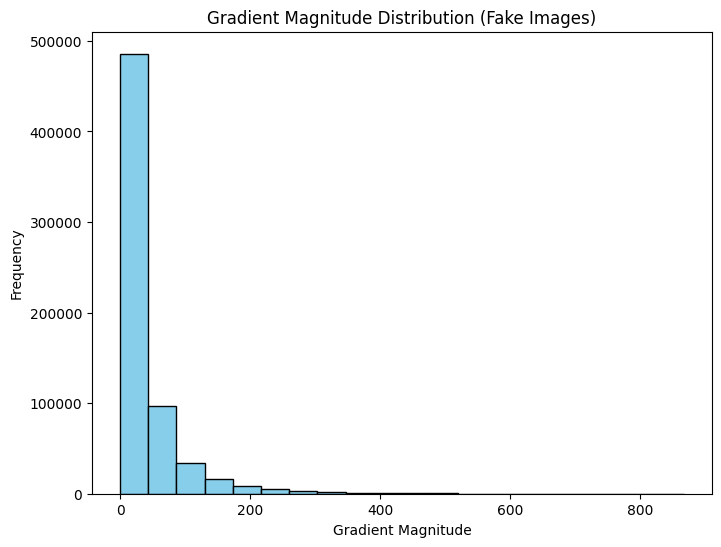

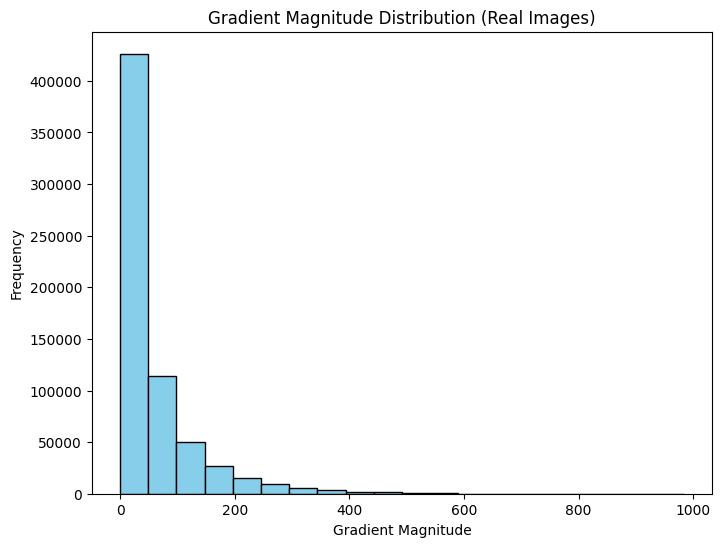

In [45]:
# Function to compute gradient magnitudes using Sobel operator
def compute_gradients(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Compute gradients using Sobel operator
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    return gradient_magnitude

# Function to compute gradient statistics for a set of images
def compute_gradient_statistics(file_paths, max_images=10):
    gradient_magnitudes = []
    for file_path in random.sample(file_paths, min(len(file_paths), max_images)):
        image = cv2.imread(file_path)
        if image is not None:
            # Compute gradient magnitudes for the image
            gradient_magnitude = compute_gradients(image)
            # Flatten the gradient magnitude array and compute statistics
            gradient_magnitudes.extend(gradient_magnitude.flatten())
    return gradient_magnitudes

# Compute gradient statistics for fake and real images separately
fake_gradient_magnitudes = compute_gradient_statistics([path for path, label in zip(X_train, y_train) if label == 0])
real_gradient_magnitudes = compute_gradient_statistics([path for path, label in zip(X_train, y_train) if label == 1])

# Plot distributions of gradient magnitudes
def plot_gradient_statistics(gradient_magnitudes, title):
    plt.figure(figsize=(8, 6))
    plt.hist(gradient_magnitudes, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Gradient Magnitude')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plot distributions of gradient magnitudes for fake images
plot_gradient_statistics(fake_gradient_magnitudes, title='Gradient Magnitude Distribution (Fake Images)')

# Plot distributions of gradient magnitudes for real images
plot_gradient_statistics(real_gradient_magnitudes, title='Gradient Magnitude Distribution (Real Images)')


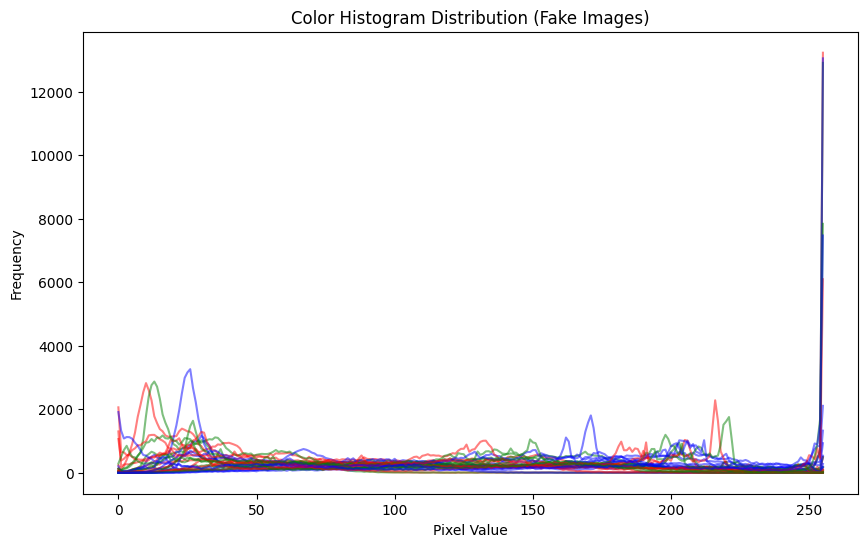

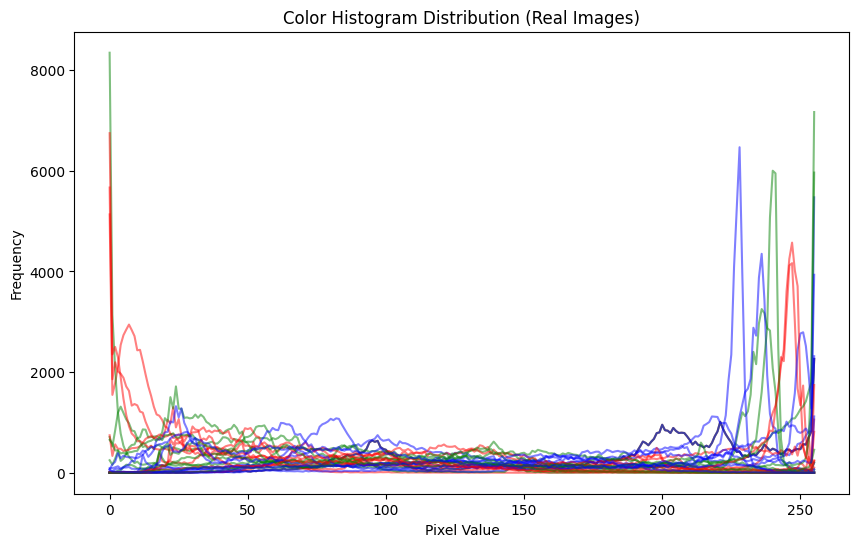

In [46]:
# Function to compute color histograms for an image
def compute_color_histograms(image):
    # Split the image into its RGB channels
    r, g, b = cv2.split(image)
    
    # Compute histograms for each channel
    hist_r, _ = np.histogram(r, bins=256, range=(0, 256))
    hist_g, _ = np.histogram(g, bins=256, range=(0, 256))
    hist_b, _ = np.histogram(b, bins=256, range=(0, 256))
    
    return hist_r, hist_g, hist_b

# Function to compute color histograms for a set of images
def compute_color_histograms_batch(file_paths, max_images=10):
    histograms = []
    for file_path in random.sample(file_paths, min(len(file_paths), max_images)):
        image = cv2.imread(file_path)
        if image is not None:
            # Compute color histograms for the image
            hist_r, hist_g, hist_b = compute_color_histograms(image)
            histograms.append((hist_r, hist_g, hist_b))
    return histograms

# Compute color histograms for fake and real images separately
fake_color_histograms = compute_color_histograms_batch([path for path, label in zip(X_train, y_train) if label == 0])
real_color_histograms = compute_color_histograms_batch([path for path, label in zip(X_train, y_train) if label == 1])

# Plot distributions of color histograms
def plot_color_histograms(histograms, title):
    plt.figure(figsize=(10, 6))
    for hist_r, hist_g, hist_b in histograms:
        plt.plot(hist_r, color='red', alpha=0.5)
        plt.plot(hist_g, color='green', alpha=0.5)
        plt.plot(hist_b, color='blue', alpha=0.5)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plot distributions of color histograms for fake images
plot_color_histograms(fake_color_histograms, title='Color Histogram Distribution (Fake Images)')

# Plot distributions of color histograms for real images
plot_color_histograms(real_color_histograms, title='Color Histogram Distribution (Real Images)')
